In [1]:
import pandas as pd
from itertools import combinations
import math
import numpy as np
import statistics
from itertools import permutations
from bioinfokit import analys, visuz
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
from matplotlib_venn import venn2
import copy
import random
from vst_function import *

In [2]:
#pd.set_option('display.max_rows', 400)
data = pd.read_csv("../data/cnvator_data_sudmant_overlapped.csv")


anotation = pd.read_csv('../data/SGDP_anotation.csv', sep=',', encoding='latin-1',  index_col=1)

data

,Sample_ID,Chr,Start_original,End_original,Start,End,SIZE,SCORE,RD,LENGHT,P-VALUE,GAUSSIAN
0,LP6005441-DNA_A01,1,231001,237900,228416,267160,3.0,duplication,2.089230,6900.0,0.000000e+00,5.215800e-35
1,LP6005441-DNA_A01,1,471201,551200,471226,471326,1.0,deletion,0.187758,80000.0,1.992160e-12,2.215930e+09
2,LP6005441-DNA_A01,1,723801,728100,712534,763301,3.0,duplication,1.594500,4300.0,1.120070e-02,1.742820e+09
3,LP6005441-DNA_A01,1,1010901,1014200,1009660,1015541,1.0,deletion,0.498249,3300.0,5.434590e-04,2.196950e+09
4,LP6005441-DNA_A01,1,4124201,4127700,4120597,4131559,1.0,deletion,0.505571,3500.0,4.553500e-11,2.217790e-35
...,...,...,...,...,...,...,...,...,...,...,...,...
256113,SS6004480,X,153459601,153466400,153408881,153523661,3.0,duplication,1.882080,6800.0,3.234320e-09,7.076210e+01
256114,SS6004480,X,153474401,153496200,153408881,153523661,3.0,duplication,1.734000,21800.0,0.000000e+00,2.123580e+09
256115,SS6004480,X,153498901,153518500,153408881,153523661,3.0,duplication,1.886020,19600.0,0.000000e+00,2.117350e+07
256116,SS6004480,X,154798801,154804000,154789310,154826421,1.0,deletion,0.315173,5200.0,3.064860e-11,2.713240e+05


In [3]:
cnv = data.pivot_table(index=["Chr", "Start", "End"], 
                    columns='Sample_ID', 
                    values='RD').reset_index()
cnv.loc[cnv['Chr'] == '8']

Sample_ID,Chr,Start,End,LP6005441-DNA_A01,LP6005441-DNA_A03,LP6005441-DNA_A04,LP6005441-DNA_A05,LP6005441-DNA_A06,LP6005441-DNA_A08,LP6005441-DNA_A09,...,SS6004471,SS6004472,SS6004473,SS6004474,SS6004475,SS6004476,SS6004477,SS6004478,SS6004479,SS6004480
7314,8,328860,335939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7315,8,593901,599598,0.000000,0.000513,NaN,0.000000,0.45164,NaN,0.408189,...,0.522202,NaN,NaN,0.001043,0.512552,0.486635,0.127359,0.495626,0.511263,NaN
7316,8,973671,986606,NaN,NaN,0.464672,0.479631,NaN,0.451451,0.330004,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7317,8,1233318,1236113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7318,8,1304525,1307677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7790,8,145534576,145536377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7791,8,145616372,145619289,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.298549
7792,8,145701887,145708679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7793,8,146195179,146224164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
coordinates = cnv.iloc[:,0:2]
cnvs = cnv.iloc[:,3:284]
cnvs = cnvs.T
cnvs = cnvs.fillna(2)
cnvs

,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
Sample_ID,,,,,,,,,,,,,,,,,,,,,
LP6005441-DNA_A01,2.089230,0.187758,1.594500,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,2.000000
LP6005441-DNA_A03,1.098060,0.795844,2.104280,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.563718,0.563718,2.0,0.532579
LP6005441-DNA_A04,1.088959,0.089448,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.062768,0.062768,2.0,2.000000
LP6005441-DNA_A05,1.945120,0.000136,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,1.61902,2.000000,2.000000,2.0,2.0,0.118046,0.118046,2.0,2.000000
LP6005441-DNA_A06,1.743018,0.002116,2.000000,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,0.097334,0.097334,2.0,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SS6004476,2.087340,0.000687,2.417060,2.0,2.0,2.0,1.46004,2.0,2.0,0.401630,...,2.00000,2.00000,0.162154,0.162154,2.0,2.0,0.167378,0.167378,2.0,2.000000
SS6004477,0.971431,0.289939,2.417685,2.0,2.0,2.0,2.00000,2.0,2.0,2.000000,...,2.00000,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,0.009885
SS6004478,1.032574,0.088507,2.628050,2.0,2.0,2.0,2.00000,2.0,2.0,0.307040,...,0.53303,2.00000,2.000000,2.000000,2.0,2.0,2.000000,2.000000,2.0,0.001413


In [5]:
features = anotation.loc[:,["7-Gender","10-Region", "11-Country",]]
dt = features.merge(cnvs, left_index=True, right_index=True)
dt


,7-Gender,10-Region,11-Country,0,1,2,3,4,5,6,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
LP6005443-DNA_B06,F,WestEurasia,Iceland,0.817642,0.001244,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.561189,0.561189,2.0,0.562057
LP6005442-DNA_D08,F,WestEurasia,Iceland,1.859167,0.000993,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.059140,0.059140,2.0,2.000000
LP6005441-DNA_D07,F,SouthAsia,Pakistan,1.179241,0.000969,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.056002,0.056002,2.0,2.000000
LP6005441-DNA_C07,M,SouthAsia,Pakistan,1.655738,0.218862,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.097988,0.097988,2.0,2.000000
LP6005442-DNA_G11,M,Africa,SierraLeone,1.843697,0.014349,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,2.000000,2.000000,2.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP6005441-DNA_H10,F,WestEurasia,Russia,1.012276,0.104367,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,0.57277,2.0,2.0,2.000000,0.061955,0.061955,2.0,2.000000
LP6005519-DNA_A06,M,EastAsia,Myanmar,1.066221,0.026512,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,2.000000,2.000000,2.0,0.000000
LP6005519-DNA_B06,M,EastAsia,Myanmar,1.153741,0.077673,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,2.000000,0.120404,0.120404,2.0,2.000000
LP6005441-DNA_B08,F,Africa,Congo,1.471292,0.069253,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.00000,2.0,2.0,0.010136,2.000000,2.000000,2.0,2.000000


In [75]:
def vst(x, y):
    
    
    ####### Groupby regions #######
    ######## V = within-population variance ######
    vx = np.var(x, axis=0)
    vy = np.var(y, axis=0)
    ########### N =  numbers of individuals sampled from population each cnv ##############    
    #nx = x.drop(columns = ['7-Gender', '10-Region', '11-Country'])
    nx = len(x)
    #ny = y.drop(columns = ['7-Gender', '10-Region', '11-Country'])
    ny = len(y)


    ######## Vt = total variance across all individuals of the pair of populations ########
    if isinstance(x, np.ndarray):
        vt = np.concatenate((x,y)).var()
        
    else:
        vt = pd.concat([x,y]).var()
    ########## Vs ################## 
    ### Vs = (V1*n1+V2*n2)/(n1+n2) 
    ## where V1 is the within-population variance of population 1, 
    ## V2 is the within population variance of population 2, 
    #n1 and n2 are the numbers of individuals sampled from population 1 and 2, respectively.
    v1 = vx*nx
    v2 = vy*ny
    ns = nx+ny
    vs = (v1+v2)/ ns
    ########## Vst #################
    #####(VT−VS)/VT
    
    vst = (vt-vs)/vt
    
        
    return(vst)


In [6]:
####### Groupby regions #######
dt_group = dt.groupby('10-Region')

dt_groupped = []
regions = anotation['10-Region'].unique()
for i in regions:
    dt_groupped.append(dt_group.get_group(str(i)))
    

#### Names to pair-population
regions = dt['10-Region'].unique()
combination_names = []
for i in list(combinations(regions,2)):
    combination_names.append(i[0]+str('-')+i[1])



In [7]:
## VST for pair-population
vst_dt = []

combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for region in combination_regions:
        statistic = vst((dt_groupped[region[0]]), (dt_groupped[region[1]]))
        vst_dt.append(statistic)

vst_dt = pd.DataFrame(vst_dt).set_axis(combination_names)
#vst_dt = vst_dt.T
vst_dt


,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
WestEurasia-SouthAsia,0.008884,0.016558,0.014467,0.013534,0.010292,0.034538,0.017628,0.014344,0.014477,0.027724,...,0.011303,0.023300,0.014483,0.010429,0.017239,0.008850,0.008859,0.008850,0.013514,0.009187
WestEurasia-Africa,0.015886,0.086130,0.053381,0.013514,0.008485,NaN,0.013514,0.018990,0.018990,0.009505,...,0.031610,0.024074,0.031904,0.023734,0.017536,0.032649,0.057872,0.056645,0.015818,0.020068
WestEurasia-CentralAsiaSiberia,0.033260,0.010014,0.020774,0.034423,0.013267,0.037037,0.028291,0.023660,0.023660,0.010663,...,0.011309,0.021119,0.010489,0.010033,0.016405,0.017178,0.018272,0.018560,0.013514,0.015872
WestEurasia-Oceania,0.042020,0.018624,0.026426,0.013514,0.016186,NaN,0.031798,0.022337,0.013514,0.014405,...,0.010951,0.015257,0.025690,0.020262,0.016164,0.016873,0.159491,0.157031,0.013514,0.133432
WestEurasia-America,0.015877,0.044205,0.047619,0.013514,0.031375,NaN,0.035331,0.013514,0.028320,0.016199,...,0.024736,0.020044,0.028447,0.039858,0.015994,0.016658,0.010662,0.010722,0.018580,0.021417
WestEurasia-EastAsia,0.008413,0.008587,0.012816,0.023858,0.012139,0.035371,0.040967,0.022884,0.014380,0.009201,...,0.032105,0.016105,0.010162,0.008350,0.017648,0.018752,0.012852,0.013118,0.013514,0.008413
SouthAsia-Africa,0.019851,0.125906,0.096191,0.034012,0.013248,0.032879,0.025422,0.015749,0.015713,0.044853,...,0.025641,NaN,0.025641,0.025641,NaN,0.033680,0.060295,0.060295,0.022727,0.027724
SouthAsia-CentralAsiaSiberia,0.046672,0.021525,0.053016,0.024609,0.015773,0.015773,0.017173,0.017173,0.017125,0.059535,...,0.015266,NaN,0.027361,0.016090,NaN,0.025641,0.025743,0.025743,NaN,0.019286
SouthAsia-Oceania,0.057050,0.015914,0.054809,0.031694,0.030873,0.030873,0.018708,0.016706,0.025641,0.068305,...,0.016301,0.041667,0.025641,0.025641,NaN,0.025641,0.191008,0.191008,NaN,0.174469
SouthAsia-America,0.022844,0.079177,0.099500,0.031376,0.030675,0.030599,0.020606,0.025491,0.019655,0.075364,...,0.025641,NaN,0.064214,0.064214,NaN,0.025641,0.016814,0.016814,0.045455,0.033814


In [8]:
filtering_vst = pd.DataFrame(vst_dt)>=0.2
filtering_vst = filtering_vst.loc[:, filtering_vst.any()]
#filtering_vst = filtering_vst.set_axis(combination_names)
filtering_vst



,36,37,49,51,55,80,105,175,176,177,...,8549,8550,8551,8562,8563,8586,8588,8646,8647,8649
WestEurasia-SouthAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-Africa,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
WestEurasia-CentralAsiaSiberia,True,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-Oceania,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-America,True,True,False,False,False,False,False,True,False,True,...,False,False,False,True,True,False,False,False,False,False
WestEurasia-EastAsia,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
SouthAsia-Africa,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SouthAsia-CentralAsiaSiberia,True,False,False,False,True,False,False,True,False,False,...,True,False,False,False,False,False,False,False,False,False
SouthAsia-Oceania,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
SouthAsia-America,True,False,False,False,False,False,False,True,True,False,...,True,True,False,True,True,False,False,False,False,False


In [9]:
## Coordinates anotation 
vst_dt = vst_dt.T
vst_dt.insert (0, 'chr', cnv['Chr'])
vst_dt.insert (1, 'start', cnv['Start'])
vst_dt.insert (2, 'end', cnv['End'])
vst_dt = vst_dt.round(5)
vst_dt

,chr,start,end,WestEurasia-SouthAsia,WestEurasia-Africa,WestEurasia-CentralAsiaSiberia,WestEurasia-Oceania,WestEurasia-America,WestEurasia-EastAsia,SouthAsia-Africa,...,Africa-CentralAsiaSiberia,Africa-Oceania,Africa-America,Africa-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-America,CentralAsiaSiberia-EastAsia,Oceania-America,Oceania-EastAsia,America-EastAsia
0,1,228416,267160,0.00888,0.01589,0.03326,0.04202,0.01588,0.00841,0.01985,...,0.02353,0.09138,0.01521,0.02111,0.13688,0.02606,0.04539,0.08230,0.04721,0.02251
1,1,471226,471326,0.01656,0.08613,0.01001,0.01862,0.04420,0.00859,0.12591,...,0.05997,0.17269,0.04347,0.08381,0.02733,0.04270,0.01370,0.11817,0.02574,0.04746
2,1,712534,763301,0.01447,0.05338,0.02077,0.02643,0.04762,0.01282,0.09619,...,0.03036,0.01701,0.01521,0.06423,0.02219,0.04843,0.03433,0.02487,0.03913,0.05833
3,1,763301,763482,0.01353,0.01351,0.03442,0.01351,0.01351,0.02386,0.03401,...,0.06028,NaN,NaN,0.04361,0.05488,0.05409,0.01549,NaN,0.03723,0.03637
4,1,769541,787076,0.01029,0.00848,0.01327,0.01619,0.03137,0.01214,0.01325,...,0.01718,0.02273,0.03380,0.01429,0.03704,0.03011,0.01370,0.04545,0.02941,0.02619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,X,154776475,154788811,0.00885,0.03265,0.01718,0.01687,0.01666,0.01875,0.03368,...,0.05679,0.05444,0.05275,0.06784,NaN,NaN,NaN,NaN,NaN,NaN
8646,X,154788811,154840186,0.00886,0.05787,0.01827,0.15949,0.01066,0.01285,0.06030,...,0.11194,0.06213,0.06873,0.09885,0.30299,0.02814,0.01498,0.24022,0.25329,0.01709
8647,X,154789310,154826421,0.00885,0.05665,0.01856,0.15703,0.01072,0.01312,0.06030,...,0.11194,0.06213,0.06873,0.09885,0.30299,0.02814,0.01498,0.24022,0.25329,0.01709
8648,X,154892549,154908191,0.01351,0.01582,0.01351,0.01351,0.01858,0.01351,0.02273,...,0.02273,0.02273,0.04892,0.02273,NaN,0.04545,NaN,0.04545,NaN,0.04545


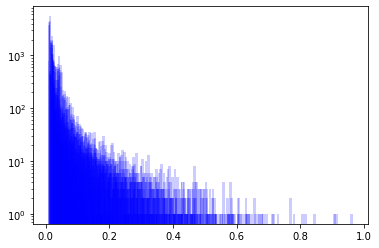

In [10]:
#sns.set_palette("bright")
for i in vst_dt.iloc[:,3:25].columns:
    plt.hist(vst_dt[i], bins=100, alpha=0.2, log=True, color="blue")

In [11]:
vst_dt.sort_values(by='WestEurasia-Oceania', ascending=False).head(20)
#vst_dt.loc[2148]

,chr,start,end,WestEurasia-SouthAsia,WestEurasia-Africa,WestEurasia-CentralAsiaSiberia,WestEurasia-Oceania,WestEurasia-America,WestEurasia-EastAsia,SouthAsia-Africa,...,Africa-CentralAsiaSiberia,Africa-Oceania,Africa-America,Africa-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-America,CentralAsiaSiberia-EastAsia,Oceania-America,Oceania-EastAsia,America-EastAsia
4519,21,23654416,23666937,0.06217,0.06229,0.45643,0.64545,0.01271,0.41020,0.19753,...,0.71952,0.91258,0.07669,0.57019,0.12577,0.52321,0.01636,0.76772,0.11334,0.37672
8456,X,93395090,93408524,0.04273,0.02600,0.03704,0.60566,NaN,0.07631,0.02094,...,0.01532,0.53334,0.02448,0.04192,0.47972,0.03704,0.03194,0.49996,0.38332,0.05134
5207,3,177002636,177011374,NaN,NaN,NaN,0.54971,NaN,NaN,NaN,...,NaN,0.51384,NaN,NaN,0.46718,NaN,NaN,0.44381,0.51744,NaN
7675,8,112293525,112300229,0.23164,0.40044,0.38714,0.53153,0.30867,0.45580,0.04718,...,0.01410,0.03842,0.02329,0.01291,0.04409,0.03004,0.01502,0.09144,0.02863,0.03273
748,10,27638079,27642286,0.01356,0.04553,0.15889,0.47682,0.01810,0.20641,0.02639,...,0.05618,0.30749,0.02301,0.08024,0.16047,0.10626,0.01695,0.41508,0.10579,0.11465
925,10,91998319,92002307,0.04880,0.01437,0.02477,0.46699,0.02318,0.01152,0.08179,...,0.02273,0.52041,0.02273,0.02999,0.51401,NaN,0.04725,0.49023,0.42737,0.04415
4830,3,32101863,32119604,0.03870,0.36853,0.01182,0.45583,0.03030,0.14330,0.23552,...,0.31025,0.03286,0.43676,0.09500,0.48584,0.07645,0.10628,0.67897,0.17366,0.21254
177,1,62642084,62656768,0.02849,0.01060,0.33042,0.44138,0.31196,0.23015,0.04280,...,0.35576,0.46692,0.34804,0.22823,0.04278,0.02052,0.02091,0.04725,0.06357,0.01990
5557,4,106939496,106945546,0.11509,0.06721,0.13976,0.43353,0.38893,0.24959,0.01930,...,0.02697,0.22607,0.17350,0.08905,0.15429,0.11067,0.04111,0.02960,0.05386,0.02863
1604,12,45899329,45910710,0.30734,0.02395,0.09397,0.43198,0.24663,0.51654,0.21599,...,0.04704,0.37612,0.18279,0.43207,0.31040,0.09750,0.32618,0.15188,0.02174,0.12868


In [12]:
#### SAVING VST FILE
vst_dt.to_csv('../data/vst_results.csv')
vst_dt

,chr,start,end,WestEurasia-SouthAsia,WestEurasia-Africa,WestEurasia-CentralAsiaSiberia,WestEurasia-Oceania,WestEurasia-America,WestEurasia-EastAsia,SouthAsia-Africa,...,Africa-CentralAsiaSiberia,Africa-Oceania,Africa-America,Africa-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-America,CentralAsiaSiberia-EastAsia,Oceania-America,Oceania-EastAsia,America-EastAsia
0,1,228416,267160,0.00888,0.01589,0.03326,0.04202,0.01588,0.00841,0.01985,...,0.02353,0.09138,0.01521,0.02111,0.13688,0.02606,0.04539,0.08230,0.04721,0.02251
1,1,471226,471326,0.01656,0.08613,0.01001,0.01862,0.04420,0.00859,0.12591,...,0.05997,0.17269,0.04347,0.08381,0.02733,0.04270,0.01370,0.11817,0.02574,0.04746
2,1,712534,763301,0.01447,0.05338,0.02077,0.02643,0.04762,0.01282,0.09619,...,0.03036,0.01701,0.01521,0.06423,0.02219,0.04843,0.03433,0.02487,0.03913,0.05833
3,1,763301,763482,0.01353,0.01351,0.03442,0.01351,0.01351,0.02386,0.03401,...,0.06028,NaN,NaN,0.04361,0.05488,0.05409,0.01549,NaN,0.03723,0.03637
4,1,769541,787076,0.01029,0.00848,0.01327,0.01619,0.03137,0.01214,0.01325,...,0.01718,0.02273,0.03380,0.01429,0.03704,0.03011,0.01370,0.04545,0.02941,0.02619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,X,154776475,154788811,0.00885,0.03265,0.01718,0.01687,0.01666,0.01875,0.03368,...,0.05679,0.05444,0.05275,0.06784,NaN,NaN,NaN,NaN,NaN,NaN
8646,X,154788811,154840186,0.00886,0.05787,0.01827,0.15949,0.01066,0.01285,0.06030,...,0.11194,0.06213,0.06873,0.09885,0.30299,0.02814,0.01498,0.24022,0.25329,0.01709
8647,X,154789310,154826421,0.00885,0.05665,0.01856,0.15703,0.01072,0.01312,0.06030,...,0.11194,0.06213,0.06873,0.09885,0.30299,0.02814,0.01498,0.24022,0.25329,0.01709
8648,X,154892549,154908191,0.01351,0.01582,0.01351,0.01351,0.01858,0.01351,0.02273,...,0.02273,0.02273,0.04892,0.02273,NaN,0.04545,NaN,0.04545,NaN,0.04545


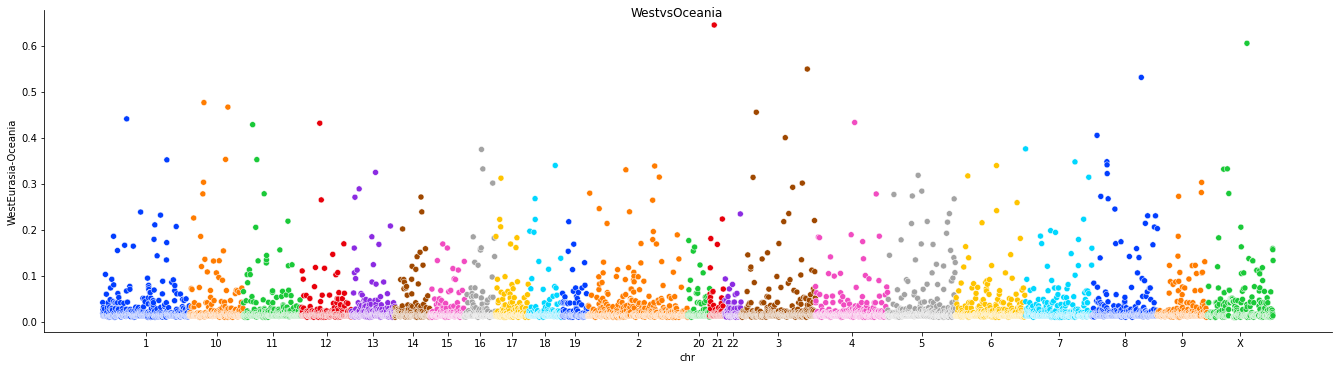

In [13]:
# Simulate DataFrame
#vst_dt['i']= vst_dt.index
vst_dt["i"] = pd.to_numeric(vst_dt.index, downcast="float")

#vst_dt['log_West_Oceania'] = np.log2(vst_dt['WestEurasia-Oceania'])

# Generate Manhattan plot: (#optional tweaks for relplot: linewidth=0, s=9)
plot = sns.relplot(data=vst_dt, x='i', y='WestEurasia-Oceania', aspect=3.7, 
                  hue='chr', palette = 'bright', legend=None) 
chrom_df=vst_dt.groupby('chr')['i'].median()
plot.ax.set_xlabel('chr'); plot.ax.set_xticks(chrom_df);
plot.ax.set_xticklabels(chrom_df.index)
plot.fig.suptitle('WestvsOceania');

<h1>  Sudmant data 

In [21]:
header= ['Sample', 'Region', 'Country', 'Sample_ID', 'Sex']
studmant_anotation = pd.read_csv('/branchinecta/jbazanwilliamson/Studmant_anotation.csv', names=header, index_col=0)#Studmant data

studmant_data = pd.read_csv('/branchinecta/jbazanwilliamson/Studmant_cnvs.csv')
#studmant_data

FileNotFoundError: [Errno 2] No such file or directory: '/branchinecta/jbazanwilliamson/Studmant_anotation.csv'

In [17]:
coordinates = studmant_data.iloc[:,0:2]
cnvs = studmant_data.iloc[:,6:284]
cnvs = cnvs.T
cnvs = cnvs.fillna(2)
statistics.variance(cnvs[1])
#cnvs[1].var()

4.8401233911286035

In [18]:
sudmant_features = studmant_anotation.loc[:,["Region","Country", "Sex",]]
sudmant_dt = sudmant_features.merge(cnvs, left_index=True, right_index=True)
sudmant_features = sudmant_dt.loc[:,['Region', 'Country', 'Sex']]
sudmant_dt = sudmant_dt[sudmant_dt['Region'].notna()]
sudmant_dt

,Region,Country,Sex,0,1,2,3,4,5,6,...,15002,15003,15004,15005,15006,15007,15008,15009,15010,15011
AFR_BantuKenya_HGDP01414_F,AFR,BantuKenya,F,-1,11,2,2,2,23,2,...,2,2,2,2,2,2,2,6,2,2
AFR_BantuKenya_HGDP01417_M,AFR,BantuKenya,M,22,10,2,2,2,24,2,...,2,2,1,1,1,1,1,6,1,1
AFR_BantuSEHerero_HGDP01028_M,AFR,BantuSEHerero,M,22,10,1,2,2,24,2,...,2,2,1,1,1,1,1,5,1,1
AFR_BantuSEHerero_HGDP01035_M,AFR,BantuSEHerero,M,-1,11,2,2,2,25,2,...,2,2,2,1,1,1,1,6,1,1
AFR_BantuSETswana_HGDP01030_M,AFR,BantuSETswana,M,23,-1,2,2,2,26,1,...,2,2,1,1,1,1,1,6,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WEA_SpainIBS_HG01504_F,WEA,SpainIBS,F,-1,12,2,2,2,24,2,...,2,2,2,2,2,2,2,6,2,2
WEA_Tuscan_HGDP01163_M,WEA,Tuscan,M,22,10,2,2,2,25,2,...,2,2,1,1,1,1,1,6,1,1
WEA_Tuscan_HGDP01168_F,WEA,Tuscan,F,-1,12,2,2,2,23,2,...,2,2,3,2,2,2,2,6,2,2
WEA_YemeniteJew_4695_F,WEA,YemeniteJew,F,22,10,2,2,2,23,2,...,2,2,2,2,2,2,2,6,2,2


In [22]:
def vst_statistic(data, region_column_name, gender_column_name, country_column_name):
    """
    data (object) = Dataframe with cnv data and features(region, country and gender)
    anotation (object) = Dataframe with only features 
    """

    ####### Data frame with features ######
    dt = data.copy()
    dt = dt.groupby(region_column_name)
    
    
    ####### Groupby regions #######
    dt_groupped = []
    regions = data[region_column_name].unique()
    for i in regions:
        dt_groupped.append(dt.get_group(str(i)))
    ######## V = within-population variance ######
    v = []
    for i in dt_groupped:
        v.append((i.var()))#You can add log2 transformation here as np.log2(i.var())
        
    ########### N =  numbers of individuals sampled from population each cnv ##############
    n = dt.count()
    n = n.drop(columns=[gender_column_name, country_column_name])
    n = n.reindex(regions)
    n = np.array(n)
    
    
    #### List of counts of regions ###
    number_of_regions = len(regions)
    numbers = []
    
    for i in range(number_of_regions):
        numbers.append(i)

    ######## Vt = total variance across all individuals of the pair of populations ########
    vt = []
    combination_regions = list(combinations(numbers,2))
    for i in combination_regions:
        pair_populations = pd.concat([dt_groupped[i[0]],dt_groupped[i[1]]])# dt_groupped[i[0]]+dt_groupped[i[1]]
        vt.append(pair_populations.var())

    ########## Vs ################## 
    ### Vs = (V1*n1+V2*n2)/(n1+n2) 
    ## where V1 is the within-population variance of population 1, 
    ## V2 is the within population variance of population 2, 
    #n1 and n2 are the numbers of individuals sampled from population 1 and 2, respectively.
    
    vs = []
    for i in combination_regions:
        v1 = v[i[0]]*n[i[0]]
        v2 = v[i[1]]*n[i[1]]
        ns = n[i[0]]+n[i[1]]
        vs_formula = (v1+v2)/ ns
        vs.append(vs_formula)
     
    ########## Vst #################
    #####(VT−VS)/VT
    
    vst = []
    for i in range(len(combination_regions)):
        vst.append(((vt[i])-(vs[i]))/(vt[i]))
        
    vst_dt = np.array(vst)
    
    vst_dt = pd.DataFrame(vst_dt)
    
    #### ADD pair-population names #####
    
    combination_names = []
    for i in list(combinations(regions,2)):
        combination_names.append(i[0]+str('-')+i[1])
    
    vst_dt = vst_dt.set_axis(combination_names)
    vst_dt = vst_dt.T
    
    return(vst_dt)

In [23]:
vst_sudmant = vst_statistic(sudmant_dt,'Region','Sex','Country')
vst_sudmant

,AFR-AMR,AFR-ARC,AFR-EA,AFR-OCN,AFR-SA,AFR-SIB,AFR-WEA,AMR-ARC,AMR-EA,AMR-OCN,...,EA-OCN,EA-SA,EA-SIB,EA-WEA,OCN-SA,OCN-SIB,OCN-WEA,SA-SIB,SA-WEA,SIB-WEA
0,-1.670680e-02,-5.611246e-02,1.356810e-03,-8.946054e-04,-1.521041e-02,-1.583980e-02,-9.271693e-03,-1.004297e-01,-0.002087,-0.004431,...,-0.015387,-0.001179,0.002476,0.011311,-3.436997e-03,0.001362,7.911560e-03,-2.070018e-02,-0.011423,-1.298243e-02
1,2.318631e-03,3.330782e-02,-6.473493e-03,-1.418707e-02,-8.560662e-03,-1.284061e-02,2.310721e-02,2.245902e-01,-0.005326,0.009260,...,-0.007499,-0.016238,-0.017936,0.014672,-1.133203e-02,-0.019884,4.804674e-02,-2.033489e-02,-0.004420,3.974328e-03
2,4.087009e-15,2.536166e-15,2.088607e-15,4.087009e-15,4.718448e-15,1.092876e-15,5.204170e-16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.011480e-15,1.641048e-15,1.342676e-15,3.011480e-15,3.656797e-15,8.743006e-16,1.734723e-16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.750000e-03,1.219512e-03,1.339286e-02,8.750000e-03,1.022727e-02,9.016393e-03,1.505102e-02,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,9.453125e-02,7.352941e-02,-8.522727e-03,-2.956432e-03,-1.518784e-02,5.155510e-02,-1.013605e-02,2.941176e-02,0.060411,0.170611,...,0.012041,-0.011521,0.025847,-0.005292,-5.089158e-03,0.114022,-3.088897e-03,5.025641e-02,-0.011878,5.133148e-02
15008,9.453125e-02,7.352941e-02,-8.522727e-03,-9.581882e-03,-1.498774e-02,5.155510e-02,-1.013605e-02,2.941176e-02,0.060411,0.163265,...,0.002661,-0.007981,0.025847,-0.005292,-1.854744e-02,0.102174,-7.988144e-03,5.923961e-02,-0.012763,5.133148e-02
15009,4.750831e-02,3.846154e-03,-1.325758e-03,2.715517e-02,3.174603e-04,2.796610e-02,2.042105e-02,3.191891e-16,0.025150,0.000000,...,0.007457,-0.013395,0.007692,-0.004350,1.998401e-15,NaN,-5.551115e-16,2.210038e-15,-0.011905,7.025630e-16
15010,9.453125e-02,7.352941e-02,-1.065969e-02,-9.581882e-03,-1.518784e-02,5.155510e-02,-1.013605e-02,2.941176e-02,0.063547,0.163265,...,-0.002990,-0.012853,0.030303,-0.008203,-1.329627e-02,0.102174,-7.988144e-03,5.025641e-02,-0.011878,5.133148e-02


In [24]:
#Coorrdinates
vst_sudmant.insert (0, 'chr', studmant_data['contig'])
vst_sudmant.insert (1, 'start', studmant_data['start'])
vst_sudmant.insert (2, 'end', studmant_data['end'])
vst_sudmant = vst_sudmant.round(5)
vst_sudmant

,chr,start,end,AFR-AMR,AFR-ARC,AFR-EA,AFR-OCN,AFR-SA,AFR-SIB,AFR-WEA,...,EA-OCN,EA-SA,EA-SIB,EA-WEA,OCN-SA,OCN-SIB,OCN-WEA,SA-SIB,SA-WEA,SIB-WEA
0,chr1,12048,177033,-0.01671,-0.05611,0.00136,-0.00089,-0.01521,-0.01584,-0.00927,...,-0.01539,-0.00118,0.00248,0.01131,-0.00344,0.00136,0.00791,-0.02070,-0.01142,-0.01298
1,chr1,12048,89237,0.00232,0.03331,-0.00647,-0.01419,-0.00856,-0.01284,0.02311,...,-0.00750,-0.01624,-0.01794,0.01467,-0.01133,-0.01988,0.04805,-0.02033,-0.00442,0.00397
2,chr1,53897994,53905803,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,chr1,114813682,114821317,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,chr1,203967055,203977106,0.00875,0.00122,0.01339,0.00875,0.01023,0.00902,0.01505,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15007,chrX,29599756,29609177,0.09453,0.07353,-0.00852,-0.00296,-0.01519,0.05156,-0.01014,...,0.01204,-0.01152,0.02585,-0.00529,-0.00509,0.11402,-0.00309,0.05026,-0.01188,0.05133
15008,chrX,136184011,136198455,0.09453,0.07353,-0.00852,-0.00958,-0.01499,0.05156,-0.01014,...,0.00266,-0.00798,0.02585,-0.00529,-0.01855,0.10217,-0.00799,0.05924,-0.01276,0.05133
15009,chrX,91366346,91368944,0.04751,0.00385,-0.00133,0.02716,0.00032,0.02797,0.02042,...,0.00746,-0.01339,0.00769,-0.00435,0.00000,NaN,-0.00000,0.00000,-0.01190,0.00000
15010,chrX,138508379,138510401,0.09453,0.07353,-0.01066,-0.00958,-0.01519,0.05156,-0.01014,...,-0.00299,-0.01285,0.03030,-0.00820,-0.01330,0.10217,-0.00799,0.05026,-0.01188,0.05133


In [25]:
vst_sudmant.sort_values(by='OCN-WEA', ascending=False)

#### SAVING VST FILE
vst_sudmant.to_csv('../data/vst_sudmant_results.csv')

<h1> T-test for independency 

In [22]:
from scipy import stats

def ttest(data, region_column_name):
    """
    data (object): data with features
    regions_column_names (str): name of column of region in data
    """
    var_cnv = data.groupby(region_column_name).var()

    #### List of counts of regions ###
    regions = data[region_column_name].unique()
    number_of_regions = len(regions)
    numbers = []
    
    for i in range(number_of_regions):
        numbers.append(i)
    
    ### T-test
    ttest = []
    combination_regions = list(combinations(numbers,2))
    
    for i in combination_regions:
        ttest.append(stats.ttest_ind(var_cnv.iloc[i[0]], var_cnv.iloc[i[1]]))

    result_ttest = []
    for i in ttest:
        result_ttest.append([i[0], i[1]])
        
    #### ADD pair-population names #####    
    combination_names = []
    for i in list(combinations(var_cnv.index,2)):
        combination_names.append(i[0]+str('-')+i[1])
        
    ttest_df = pd.DataFrame(result_ttest)
    ttest_df = ttest_df.set_axis(combination_names) 
    ttest_df.columns = ['statistic', 'pvalue']

    
    return(ttest_df)

    

In [23]:
ttest_df = ttest(sudmant_dt, 'Region')

NameError: name 'sudmant_dt' is not defined

Text(0.5, 1.0, 'Sudmant')

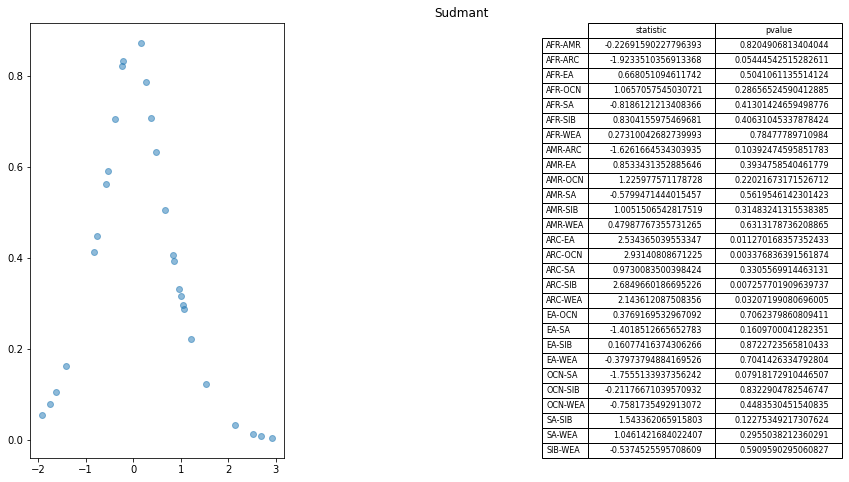

In [28]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(121)
ax1.scatter(x=ttest_df['statistic'],y=ttest_df['pvalue'], alpha=0.5)

ax2 = fig.add_subplot(122)
font_size=8
bbox=[1, 0, 1, 1]
ax2.axis('off')
mpl_table = ax2.table(cellText = ttest_df.values, rowLabels = ttest_df.index, bbox=bbox, colLabels=ttest_df.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
plt.title("Sudmant")

Text(0.5, 1.0, 'My Data')

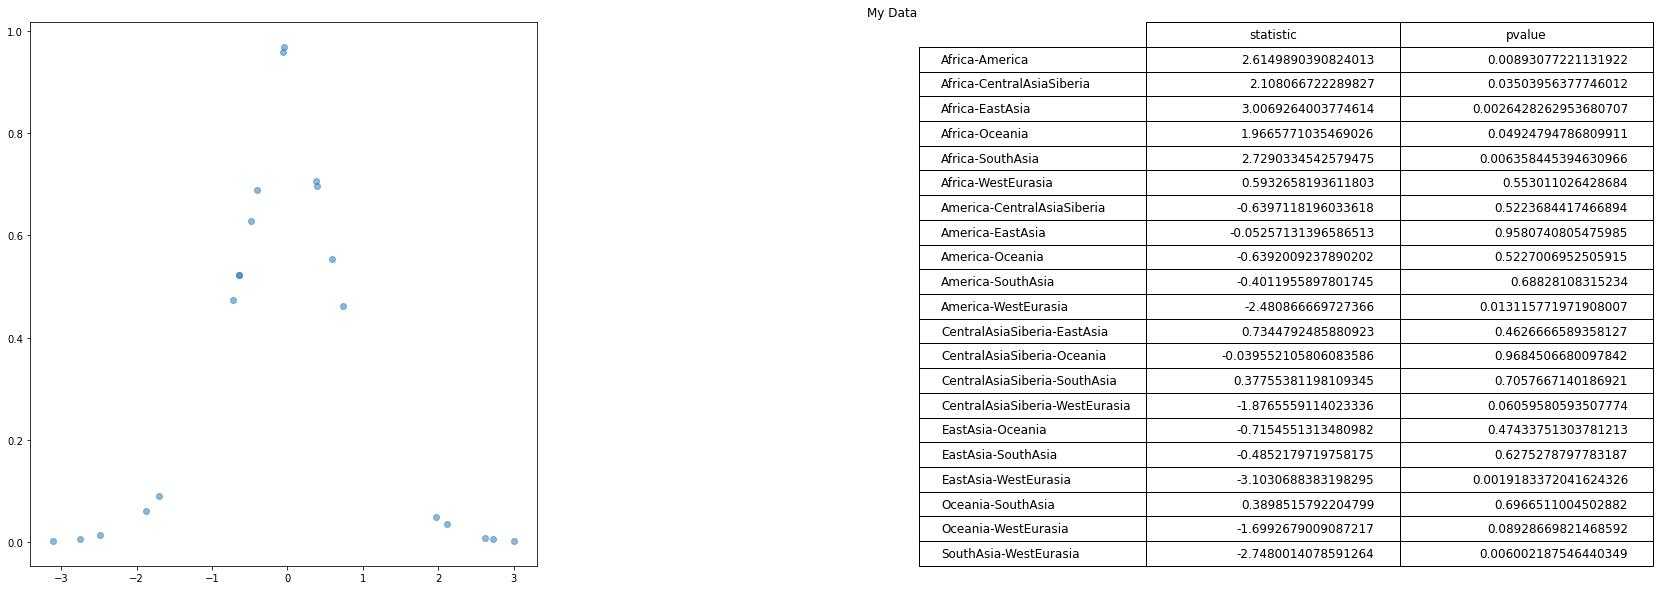

In [29]:
ttest_df = ttest(dt, '10-Region')
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.scatter(x=ttest_df['statistic'],y=ttest_df['pvalue'], alpha=0.5)

ax2 = fig.add_subplot(122)
font_size= 12
bbox=[1, 0, 1,1]
ax2.axis('off')
mpl_table = ax2.table(cellText = ttest_df.values, rowLabels = ttest_df.index, bbox=bbox, colLabels=ttest_df.columns)
mpl_table.auto_set_font_size(False)
mpl_table.set_fontsize(font_size)
plt.title("My Data")

<h1> Computing permutation for each pair-group whole samples

In [14]:
from stattools.resampling import PermutationTest
PermutationTest

stattools.resampling.permutation.PermutationTest

In [16]:
pt = PermutationTest(dt_group.get_group(str('WestEurasia'))[176], dt_group.get_group(str('America'))[176], stat=vst, n_perm=999)

In [17]:
p_value_ = pt.p_value()
print(f"p-value: {p_value_:.4f}")

p-value: 0.0050


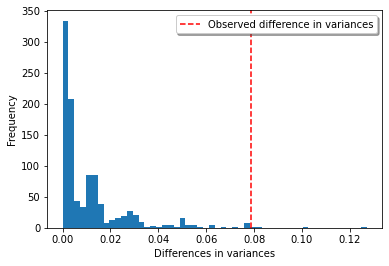

In [18]:
plt.figure()
plt.hist(pt.dist, bins="auto")
plt.axvline(pt.observed, c="r", ls="--", label="Observed difference in variances")
plt.legend(loc="best", frameon=True, shadow=True)
plt.xlabel("Differences in variances")
plt.ylabel("Frequency")
plt.show()
plt.close()

<h2> I ran this as a job cause takes a while (~2 days)

In [19]:
p_value_permutation = []

combination_regions = list(combinations([0,1,2,3,4,5,6],2))
for region in combination_regions:
    
    p_value= []
    p_value_permutation.append(p_value)
    for i in range(10):
        permutation = PermutationTest(dt_groupped[region[0]][i], dt_groupped[region[1]][i], stat=vst, n_perm=999)#mean_gt
        p_value.append(permutation.p_value())

/Users/luciabazan/Documents/GitHub/cnv_sgdp/scripts/vst_function.py:44: RuntimeWarning: invalid value encountered in double_scalars
  vst = (vt-vs)/vt


In [20]:
names = []
regions = dt['10-Region'].unique()
for i in list(combinations(regions,2)):
    names.append(i[0]+str('-')+i[1])

In [21]:
permutation_df = pd.DataFrame(p_value_permutation)
permutation_df = permutation_df.set_axis(names)
permutation_df

,0,1,2,3,4,5,6,7,8,9
WestEurasia-SouthAsia,0.945,0.363,0.438,0.502,0.764,0.097,0.349,0.717,0.589,0.163
WestEurasia-Africa,0.356,0.003,0.019,1.000,0.997,0.001,1.000,0.324,0.367,0.760
WestEurasia-CentralAsiaSiberia,0.134,0.926,0.304,0.141,0.613,0.171,0.248,0.162,0.168,0.906
WestEurasia-Oceania,0.067,0.356,0.230,0.586,0.748,0.001,0.200,0.139,0.410,0.396
WestEurasia-America,0.454,0.072,0.054,0.991,0.186,0.001,0.158,0.389,0.165,0.394
WestEurasia-EastAsia,0.928,0.871,0.480,0.297,0.538,0.097,0.044,0.358,0.700,0.774
SouthAsia-Africa,0.434,0.001,0.003,0.099,0.589,0.172,0.302,0.791,0.981,0.220
SouthAsia-CentralAsiaSiberia,0.134,0.541,0.133,0.490,0.811,0.811,0.589,0.613,0.603,0.097
SouthAsia-Oceania,0.110,0.960,0.111,0.460,0.732,0.772,0.545,0.845,0.921,0.025
SouthAsia-America,0.545,0.041,0.020,0.677,0.558,0.768,0.665,0.792,0.537,0.106


<h1> Results from job

In [34]:
results_permutation = pd.read_csv("../data/permutation_results.csv", index_col=0)
results_permutation.columns = results_permutation.columns.astype(int)# df['DataFrame Column'].astype(int)
results_permutation

,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
WestEurasia-SouthAsia,0.9114,0.3189,0.4430,0.6867,0.7506,0.1114,0.3458,0.7010,0.6163,0.1677,...,0.7255,0.1268,0.4869,0.8451,0.4459,0.7991,0.8711,0.9670,1.0000,0.8762
WestEurasia-Africa,0.2908,0.0026,0.0269,0.7753,0.9803,0.0001,1.0000,0.3584,0.3572,0.7694,...,0.1488,0.1717,0.0693,0.1397,0.2631,0.0991,0.0101,0.0109,0.5979,0.2300
WestEurasia-CentralAsiaSiberia,0.1060,0.7632,0.2925,0.1192,0.5670,0.2671,0.2059,0.1567,0.1647,0.9123,...,0.7525,0.1164,0.8984,0.7340,0.3670,0.5355,0.8605,0.8573,1.0000,0.5427
WestEurasia-Oceania,0.0436,0.5164,0.2940,0.5710,0.7842,0.0001,0.2064,0.1671,0.4162,0.4019,...,0.7953,0.5046,0.3041,0.2987,0.3662,0.3806,0.0001,0.0003,0.9788,0.0046
WestEurasia-America,0.6138,0.1196,0.0554,1.0000,0.1894,0.0001,0.1517,0.3997,0.1777,0.4009,...,0.4094,0.1954,0.2016,0.0610,0.7810,0.6599,0.7541,0.7074,0.4115,0.3164
WestEurasia-EastAsia,0.9166,0.8416,0.4156,0.2922,0.5462,0.0984,0.0399,0.3655,0.7226,0.7684,...,0.1097,0.3832,0.5941,0.8095,0.2742,0.3092,0.4675,0.4113,1.0000,0.9982
SouthAsia-Africa,0.3823,0.0003,0.0075,0.1119,0.6173,0.2061,0.3351,0.7848,0.9815,0.2218,...,0.4714,0.0001,0.0697,0.0750,0.0001,0.2036,0.0281,0.0302,0.7906,0.3082
SouthAsia-CentralAsiaSiberia,0.1346,0.5866,0.1072,0.4934,0.7880,0.7746,0.5565,0.5642,0.6185,0.1152,...,0.9736,0.0001,0.5201,0.9665,0.0001,0.5301,0.2080,0.2194,0.0001,0.6283
SouthAsia-Oceania,0.0576,0.9220,0.1512,0.4501,0.7622,0.7584,0.5625,0.8045,0.9188,0.1005,...,1.0000,0.3721,0.7239,0.7250,0.0001,0.8898,0.0004,0.0002,0.0001,0.0164
SouthAsia-America,0.7402,0.0917,0.0216,0.6956,0.5801,0.7710,0.6672,0.8927,0.5597,0.1132,...,1.0000,0.0001,0.0851,0.0818,0.0001,0.6249,0.6144,0.6215,0.3456,0.3799


In [36]:
boolean = (results_permutation<=0.05)


## Deleting columns where none of the regions passed the imputation
boolean = boolean.loc[:, boolean.any()]
boolean

,0,1,2,3,5,6,10,12,13,14,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
WestEurasia-SouthAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-Africa,False,True,True,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,True,False,False
WestEurasia-CentralAsiaSiberia,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-Oceania,True,False,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,True,False,True
WestEurasia-America,False,False,False,False,True,False,True,False,False,True,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-EastAsia,False,False,False,False,False,True,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
SouthAsia-Africa,False,True,True,False,False,False,False,True,False,False,...,False,True,False,False,True,False,True,True,False,False
SouthAsia-CentralAsiaSiberia,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
SouthAsia-Oceania,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,True,True,True,True
SouthAsia-America,False,False,True,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,False,False


In [37]:
name_1 = []
name_2 = []

for i,row in boolean.iterrows():
    ls_1 = [(i.split("-")[0])]
    ls_2 = [i.split("-")[1]]
    #ls_1.append(i.split("-")[0])
    name_1.append(i.split("-")[0])
    name_2.append(i.split("-")[1])
    #ls.append(ls_1)
    #ls.append(ls_2)


In [38]:
boolean.insert (0, 'group_1', name_1)
boolean.insert (1, 'group_2', name_2)

In [39]:
boolean

,group_1,group_2,0,1,2,3,5,6,10,12,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
WestEurasia-SouthAsia,WestEurasia,SouthAsia,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-Africa,WestEurasia,Africa,False,True,True,False,True,False,False,False,...,False,False,False,False,False,False,True,True,False,False
WestEurasia-CentralAsiaSiberia,WestEurasia,CentralAsiaSiberia,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-Oceania,WestEurasia,Oceania,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,True,True,False,True
WestEurasia-America,WestEurasia,America,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
WestEurasia-EastAsia,WestEurasia,EastAsia,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
SouthAsia-Africa,SouthAsia,Africa,False,True,True,False,False,False,False,True,...,False,True,False,False,True,False,True,True,False,False
SouthAsia-CentralAsiaSiberia,SouthAsia,CentralAsiaSiberia,False,False,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,True,False
SouthAsia-Oceania,SouthAsia,Oceania,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,True,True,True,True
SouthAsia-America,SouthAsia,America,False,False,True,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False


<h1> Vst group vs allothers

In [40]:
## Vst
regions = dt['10-Region'].unique()
vst_group_vs_others = []
for region in regions:
        permutation = vst(dt[dt['10-Region'] == region],(dt[dt['10-Region'] != region]))
        vst_group_vs_others.append(permutation)

vt = pd.DataFrame(vst_group_vs_others)
filtering_vst = pd.DataFrame(vt)>=0.2
filtering_vst = filtering_vst.loc[:, filtering_vst.any()]
filtering_vst_allothers = filtering_vst.set_index(regions)
filtering_vst_allothers



,36,201,455,474,494,510,548,661,710,740,...,8284,8306,8307,8322,8405,8406,8456,8562,8563,8586
WestEurasia,False,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
SouthAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Africa,False,True,True,False,True,True,False,True,False,False,...,False,True,True,False,False,False,False,False,False,True
CentralAsiaSiberia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Oceania,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,True,False,False,False
America,True,False,False,False,False,False,True,False,True,False,...,False,False,False,False,True,True,False,True,True,False
EastAsia,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
## Coordinates anotation 
vt_dt = pd.DataFrame(vst_group_vs_others).set_index(regions).T
vt_dt.insert (0, 'chr', cnv['Chr'])
vt_dt.insert (1, 'start', cnv['Start'])
vt_dt.insert (2, 'end', cnv['End'])
vt_dt = vt_dt.round(5)
vt_dt.sort_values(by='Oceania', ascending=False).head(20)

,chr,start,end,WestEurasia,SouthAsia,Africa,CentralAsiaSiberia,Oceania,America,EastAsia
5207,3,177002636,177011374,0.02419,0.01286,0.01427,0.00971,0.59310,0.00849,0.01485
8456,X,93395090,93408524,0.03981,0.00629,0.01514,0.00859,0.42783,0.01218,0.00374
6393,6,30065894,30068872,0.01587,0.00913,0.00996,0.00725,0.35471,0.00652,0.01031
925,10,91998319,92002307,0.01904,0.00732,0.02014,0.01747,0.34730,0.01468,0.00676
2882,16,85101681,85104890,0.01264,0.00951,0.01041,0.00751,0.34279,0.00672,0.01078
8284,X,31529162,31554252,0.01271,0.00431,0.01622,0.00983,0.32973,0.01378,0.00590
8119,9,131362536,131365905,0.01533,0.00888,0.00691,0.00709,0.30900,0.00639,0.01002
6026,5,79900557,79910136,0.01877,0.00441,0.00513,0.00811,0.28135,0.00720,0.01189
1108,11,21847054,21849813,0.01226,0.01368,0.00366,0.00396,0.28011,0.02044,0.01798
3195,18,12196209,12196772,0.01668,0.00665,0.00480,0.00749,0.27702,0.00671,0.01075


<h1> Permutation each group vs all other

In [42]:
#dt[dt['10-Region'] == region].drop(columns=['7-Gender', '10-Region', '11-Country'])
p_value_permutation = []
for region in regions:
    p_value= []
    p_value_permutation.append(p_value)
    x = dt[dt['10-Region'] == region].drop(columns=['7-Gender', '10-Region', '11-Country'])
    y = dt[dt['10-Region'] != region].drop(columns=['7-Gender', '10-Region', '11-Country'])
    for i in range(10):
        
        permutation = PermutationTest(x[i], y[i], stat=vst_gt, n_perm=9999)
        p_value.append(permutation.p_value())
        
        

In [43]:
p_value_permutation

[[0.7514,
  0.5599,
  0.3679,
  0.5361,
  0.605,
  0.1016,
  0.2024,
  0.3212,
  0.3785,
  0.9156],
 [0.8969,
  0.0808,
  0.1054,
  0.6245,
  0.9874,
  0.1191,
  0.8023,
  0.8931,
  0.7921,
  0.0718],
 [0.3347,
  0.0057,
  0.0321,
  0.2993,
  0.6704,
  0.3192,
  0.2439,
  0.1575,
  0.1529,
  0.5649],
 [0.1084,
  0.863,
  0.5491,
  0.0411,
  0.7378,
  0.0975,
  0.7457,
  0.7264,
  0.776,
  0.9341],
 [0.0123,
  0.1462,
  0.2948,
  0.3515,
  0.2442,
  0.666,
  0.7804,
  0.9773,
  0.4247,
  0.4017],
 [0.4652,
  0.1279,
  0.1369,
  0.5193,
  0.0517,
  0.7797,
  0.7376,
  0.3829,
  0.8661,
  0.4143],
 [0.7069,
  0.8333,
  0.067,
  0.0935,
  0.9287,
  0.121,
  0.0625,
  0.6833,
  0.9848,
  0.5679]]

<h2> Permutation results from job

In [44]:
## Results from permutation_group_vs_allothers.py
results_permutation_allothers = pd.read_csv("../data/permutation_results_group_vs_allothers.csv", index_col=0)
results_permutation_allothers.columns = results_permutation_allothers.columns.astype(int)
results_permutation_allothers

,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
WestEurasia,0.7763,0.5638,0.4709,0.5432,0.5865,0.1036,0.1983,0.3655,0.3670,0.9270,...,0.0673,0.0121,0.5265,0.8334,0.0221,0.9534,0.3396,0.3068,0.3579,0.2520
SouthAsia,0.8911,0.1855,0.1460,0.6196,0.9454,0.1217,0.8063,0.8622,0.7984,0.0652,...,0.6533,0.6384,0.6020,0.8719,0.6040,0.9403,0.2688,0.2711,0.9311,0.4307
Africa,0.2495,0.0382,0.0379,0.2999,0.6380,0.2181,0.2150,0.1183,0.1317,0.5839,...,0.3268,0.4820,0.1120,0.2378,0.6318,0.0038,0.0060,0.0044,0.4016,0.4078
CentralAsiaSiberia,0.0767,0.6210,0.4831,0.0451,0.7475,0.0948,0.7369,0.7733,0.7884,0.9337,...,0.8064,0.7271,0.5315,0.8644,0.3569,0.4027,0.1873,0.1966,0.2627,0.1761
Oceania,0.0046,0.5148,0.3929,0.2780,0.3036,0.5815,0.7839,0.9697,0.3749,0.3985,...,0.8566,0.8441,0.2501,0.5090,0.7675,0.5921,0.0001,0.0001,0.2522,0.0058
America,0.6367,0.1324,0.1232,0.4925,0.0502,0.6513,0.7574,0.4154,0.8681,0.4145,...,0.5787,0.7268,0.0163,0.0088,0.3790,0.2950,0.7052,0.6865,0.1192,0.5310
EastAsia,0.7204,0.9610,0.0452,0.0912,0.9625,0.1229,0.0673,0.8457,0.9225,0.5620,...,0.1205,0.8928,0.7190,0.9996,0.6953,0.1823,0.3118,0.3247,0.5680,0.4388


In [45]:
## Results from permutation_group_vs_allothers.py
results_permutation_allothers = pd.read_csv("../data/permutation_results_group_vs_allothers_2.csv", index_col=0)
results_permutation_allothers.columns = results_permutation_allothers.columns.astype(int)
results_permutation_allothers

,0,1,2,3,4,5,6,7,8,9,...,8640,8641,8642,8643,8644,8645,8646,8647,8648,8649
WestEurasia,0.7543,0.5602,0.3694,0.5305,0.6089,0.1002,0.1942,0.3258,0.3815,0.9179,...,0.0529,0.0111,0.5208,0.8339,0.0239,0.9689,0.2620,0.2807,0.3576,0.2940
SouthAsia,0.8952,0.0781,0.0993,0.6202,0.9845,0.1161,0.8099,0.8894,0.7981,0.0642,...,0.7158,0.6417,0.6099,0.8741,0.6025,0.9419,0.4846,0.4799,0.9262,0.3342
Africa,0.3299,0.0083,0.0343,0.2920,0.6733,0.3118,0.2432,0.1523,0.1530,0.5663,...,0.2974,0.1946,0.1142,0.2407,0.7291,0.0033,0.0095,0.0110,0.3949,0.4062
CentralAsiaSiberia,0.1064,0.8608,0.5457,0.0481,0.7273,0.0964,0.7504,0.7205,0.7813,0.9358,...,0.8366,0.7360,0.5342,0.9861,0.3132,0.4988,0.0935,0.0954,0.2764,0.1263
Oceania,0.0109,0.1491,0.2945,0.3591,0.2375,0.6484,0.7804,0.9744,0.4341,0.3976,...,0.8599,0.8344,0.2331,0.5819,0.7598,0.5798,0.0001,0.0001,0.5330,0.0003
America,0.4674,0.1236,0.1272,0.5240,0.0554,0.7709,0.7486,0.3784,0.8694,0.4097,...,0.4765,0.6878,0.0164,0.0093,0.3880,0.2991,0.4680,0.4755,0.1187,0.5102
EastAsia,0.7099,0.8297,0.0636,0.0958,0.9266,0.1216,0.0666,0.6823,0.9847,0.5661,...,0.1389,0.9023,0.7240,0.9997,0.6464,0.1717,0.0734,0.0701,0.5879,0.5135


In [46]:
boolean_allothers = (results_permutation_allothers<=0.05)

## Deleting columns where none of the regions passed the imputation
boolean_allothers = boolean_allothers.loc[:, boolean_allothers.any()]

In [47]:
boolean_allothers

,0,1,2,3,13,14,16,20,25,27,...,8635,8636,8641,8642,8643,8644,8645,8646,8647,8649
WestEurasia,False,False,False,False,False,False,False,True,False,False,...,False,True,True,False,False,True,False,False,False,False
SouthAsia,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Africa,False,True,True,False,False,False,False,False,True,False,...,False,True,False,False,False,False,True,True,True,False
CentralAsiaSiberia,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
Oceania,True,False,False,False,True,False,False,True,False,True,...,False,False,False,False,False,False,False,True,True,True
America,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
EastAsia,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h1> Venn diagram

Text(0.5, 1.0, 'Genes that passed permutation in any group(p-value <0.05)')

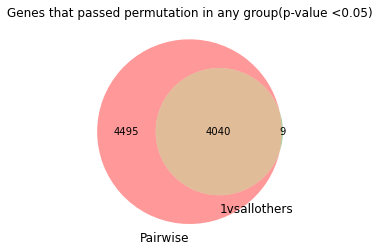

In [325]:
#PERMUTATION RESULTS
inner_per = len(pd.concat([boolean.T, boolean_allothers.T], axis=1, join="inner"))
left_per = len(boolean.T) - inner_per
right_per = len(boolean_allothers.T) -inner_per


venn2(subsets = (left_per, right_per, inner_per), set_labels = ('Pairwise', '1vsallothers'))
plt.title('Genes that passed permutation in any group(p-value <0.05)')


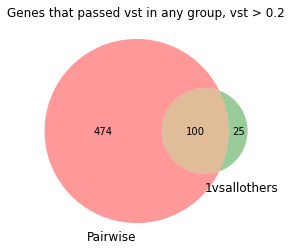

In [326]:
# VST RESULTS 
inner_vst = len(pd.concat([filtering_vst_allothers.T, filtering_vst.T], axis=1, join="inner"))
left_vst = len(filtering_vst.T) - inner_vst
right_vst = len(filtering_vst_allothers.T) -inner_vst


venn2(subsets = (left_vst, right_vst, inner_vst), set_labels = ('Pairwise', '1vsallothers'))
plt.title('Genes that passed vst in any group, vst > 0.2')
plt.show()

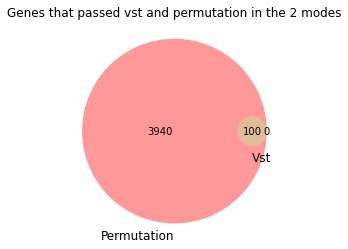

In [327]:
inner_p = pd.concat([boolean.T, boolean_allothers.T], axis=1, join="inner")#pd.concat([boolean.T, boolean_allothers.T], axis=1, join="inner")
inner_v = pd.concat([filtering_vst_allothers.T, filtering_vst.T], axis=1, join="inner")
inner_x = len(pd.concat([inner_v, inner_p],join='inner', axis=1))
left = len(inner_p) - inner_x
right = (inner_vst - inner_x)


venn2(subsets = (int(left), int(right),int(inner_x)),  set_labels = ('Permutation', 'Vst'))
plt.title('Genes that passed vst and permutation in the 2 modes')
plt.show()

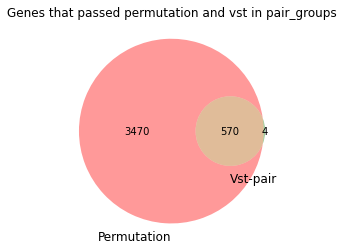

In [333]:
inner_v_pair = filtering_vst.T#pd.concat([filtering_vst_allothers.T, filtering_vst.T], axis=1, join="inner")
inner_x_pair = len(pd.concat([inner_v_pair, inner_p],join='inner', axis=1))
left_pair = len(inner_p) - inner_x_pair
right_pair =  len(inner_v_pair) - inner_x_pair


venn2(subsets = (int(left_pair), int(right_pair),int(inner_x_pair)),  set_labels = ('Permutation', 'Vst-pair'))
plt.title('Genes that passed permutation and vst in pair_groups')
plt.show()

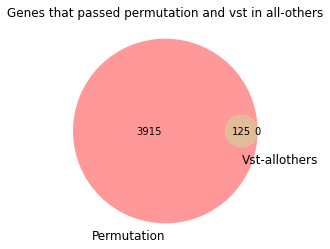

In [334]:
inner_v = filtering_vst_allothers.T#pd.concat([filtering_vst_allothers.T, filtering_vst.T], axis=1, join="inner")
inner_x = len(pd.concat([inner_v, inner_p],join='inner', axis=1))
left = len(inner_p) - inner_x
right =  len(inner_v) - inner_x


venn2(subsets = (int(left), int(right),int(inner_x)),  set_labels = ('Permutation', 'Vst-allothers'))
plt.title('Genes that passed permutation and vst in all-others')
plt.show()

Text(0.5, 1.0, 'Genes that passed permutation and vst in pair_groups')

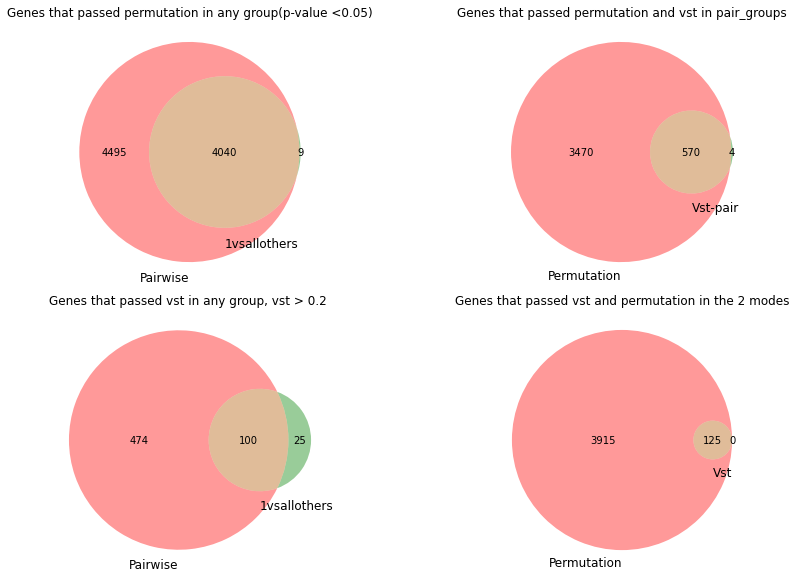

In [335]:
fig = plt.figure()

ax = fig.add_axes([0,1,0.9,0.9])
venn2(subsets = (left_per, right_per, inner_per), set_labels = ('Pairwise', '1vsallothers'))
plt.title('Genes that passed permutation in any group(p-value <0.05)')


ax = fig.add_axes([0,0,0.9,0.9])
venn2(subsets = (left_vst, right_vst, inner_vst), set_labels = ('Pairwise', '1vsallothers'))
plt.title('Genes that passed vst in any group, vst > 0.2', loc='left')


ax = fig.add_axes([1,0,0.9,0.9])
venn2(subsets = (int(left), int(right),int(inner_x)),  set_labels = ('Permutation', 'Vst'))
plt.title('Genes that passed vst and permutation in the 2 modes')

#plt.show()

ax = fig.add_axes([1,1,0.9,0.9])
venn2(subsets = (int(left_pair), int(right_pair),int(inner_x_pair)),  set_labels = ('Permutation', 'Vst-pair'))
plt.title('Genes that passed permutation and vst in pair_groups')


In [75]:
## Getting genes that pass vst and passed perm in the group 

In [336]:
pd.concat([inner_v, inner_p],join='inner', axis=1).drop(columns=names)

,WestEurasia,SouthAsia,Africa,CentralAsiaSiberia,Oceania,America,EastAsia,WestEurasia,SouthAsia,Africa,CentralAsiaSiberia,Oceania,America,EastAsia
36,False,False,False,False,False,True,False,True,False,True,True,False,True,True
201,False,False,True,False,False,False,False,False,False,True,True,True,False,True
455,False,False,True,False,False,False,False,False,False,True,True,False,False,True
474,True,False,False,False,False,False,False,True,False,True,False,True,True,True
494,False,False,True,False,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8406,False,False,False,False,False,True,False,False,False,False,False,False,True,False
8456,False,False,False,False,True,False,False,True,False,False,False,True,False,False
8562,False,False,False,False,False,True,False,True,False,False,False,False,True,True
8563,False,False,False,False,False,True,False,True,False,False,False,False,True,True


In [81]:
vst_hundred_allothers = pd.concat([filtering_vst_allothers.T, filtering_vst.T], axis=1, join="inner").drop(columns=names)
permut_hundred = pd.concat([vst_hundred_allothers, inner_p],join='inner', axis=1).drop(columns=names)
permut_hundred = permut_hundred.iloc[:, 7:15]
vst_hundred_allothers

,WestEurasia,SouthAsia,Africa,CentralAsiaSiberia,Oceania,America,EastAsia
36,False,False,False,False,False,True,False
201,False,False,True,False,False,False,False
455,False,False,True,False,False,False,False
474,True,False,False,False,False,False,False
510,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
8406,False,False,False,False,False,True,False
8456,False,False,False,False,True,False,False
8562,False,False,False,False,False,True,False
8563,False,False,False,False,False,True,False


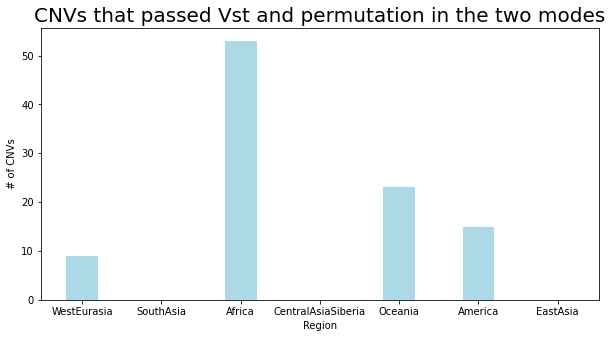

In [181]:
dist = vst_hundred_allothers.sum()

filtering_vst_allothers.T.sum()

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dist.index, dist, color ='lightblue',
        width = 0.4)
 
plt.xlabel("Region")
plt.ylabel("# of CNVs")
plt.title("CNVs that passed Vst and permutation in the two modes", size=20)
plt.show()

TypeError: inner() got multiple values for argument 'ax'

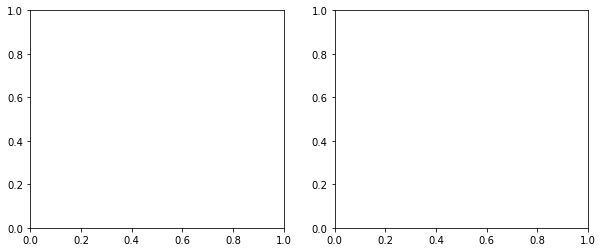

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))

#sns.set_palette("bright")
for i in filtering_vst.T.columns:
    plt.hist(vst_dt[i], bins=100, alpha=0.2, log=True, color="blue",  ax=ax[0])
    
    
    

dist = filtering_vst.T.sum()

#fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(dist.index, dist, color ='blue',  ax=ax[1])
 
#plt.xlabel("Pairwise combination")
#plt.ylabel("# of CNVs passed perrmutation")
#plt.title("CNVs that passed Vst(pair-group) and permutation", size=20)
plt.xticks(rotation=90)
plt.show()




    
    

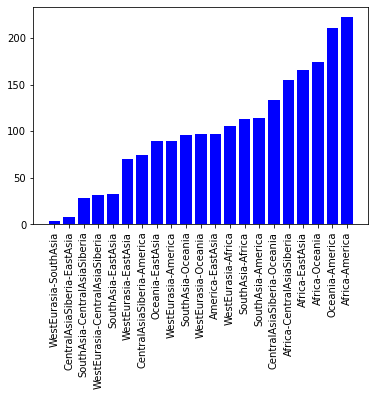

In [54]:
d = []
for i in filtering_vst.T.columns:
    plt.hist(vst_dt[i], bins=100, alpha=0.2, log=True, color="blue")
    
    



In [29]:
## Keep only cnvs that are >0.2 in X region and passed the permutation in X region too.

In [6]:
passed = []
for index in vst_hundred_allothers.index:
    for i in regions:
        if vst_hundred_allothers[i][index] == True & permut_hundred[i][index]==True:
            passed.append(index)
            
len(passed)

NameError: name 'vst_hundred_allothers' is not defined

In [138]:
passed = []
a = vst_dt.T>0.2
d= (results_permutation<=0.05).T
for index in a.index:
    for i in combination_names:
        if a[i][index] == True & d[i][index]==True:
            passed.append(index)
            
b = [*set(passed)] ## dropping duplicates 
len(b)

570

In [207]:
rna_seq = pd.read_csv('/branchinecta/jbazanwilliamson/rna-seq/GSE54308_gene_fpkm_table.txt', sep='\t')
#https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE54308

In [337]:
genes_id= pd.read_csv("../data/vst_gene_anotation.csv")
genes_id = genes_id.iloc[:,0:4]
genes_id.columns =['chr', 'start', 'end', 'gene_name']
genes_id = genes_id.replace(23, 'X')
genes_id

,chr,start,end,gene_name
0,1,100517299,100523294,MFSD14A
1,1,10067509,10076124,RBP7
2,1,1009660,1015541,RNF223
3,1,102395735,102403958,OLFM3
4,1,10272327,10278119,KIF1B
...,...,...,...,...
3811,X,8766763,8770552,FAM9A
3812,X,91366346,91368944,PCDH11X
3813,X,96606076,96609958,DIAPH2
3814,X,96618876,96624473,DIAPH2


In [338]:
pd.merge(genes_id, rna_seq, on="gene_name")

,chr,start,end,gene_name,tracking_id,gene_id,tss,HGDP00711,HGDP00712,HGDP00713,...,HGDP00992,HGDP01029,HGDP01036,HGDP00948,HGDP00950,HGDP00955,HGDP00959,HGDP00964,HGDP00967,Unnamed: 49
0,1,10067509,10076124,RBP7,ENSG00000162444.10,ENSG00000162444.10,chr1:10057263,0.045455,0.000000,0.001535,...,0.000768,0.001357,0.000000,0.000000,0.000000,0.000000,0.003153,0.000000,0.000000,NaN
1,1,1009660,1015541,RNF223,ENSG00000237330.1,ENSG00000237330.1,chr1:1007125,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,1,102395735,102403958,OLFM3,ENSG00000118733.12,ENSG00000118733.12,chr1:102268129,0.000685,0.000000,0.000000,...,0.002227,0.000000,0.000148,0.001233,0.000647,0.000000,0.000628,0.000080,0.000000,NaN
3,1,10272327,10278119,KIF1B,ENSG00000054523.12,ENSG00000054523.12,chr1:10270862,0.211373,0.659287,0.110827,...,0.213246,0.000000,0.177245,0.721959,0.458517,0.074492,0.126583,0.135498,0.179244,NaN
4,1,10282248,10326922,KIF1B,ENSG00000054523.12,ENSG00000054523.12,chr1:10270862,0.211373,0.659287,0.110827,...,0.213246,0.000000,0.177245,0.721959,0.458517,0.074492,0.126583,0.135498,0.179244,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,X,8766763,8770552,FAM9A,ENSG00000183304.6,ENSG00000183304.6,chrX:8758835,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2984,X,91366346,91368944,PCDH11X,ENSG00000102290.16,ENSG00000102290.16,chrX:91034259,0.002381,0.002490,0.001839,...,0.000400,0.000264,0.001291,0.003805,0.002114,0.003467,0.002364,0.001133,0.001869,NaN
2985,X,96606076,96609958,DIAPH2,ENSG00000147202.13,ENSG00000147202.13,chrX:95939661,1.818720,1.729440,0.503148,...,0.163489,0.428040,0.651110,1.670460,2.112000,0.630458,1.380020,0.668613,0.979208,NaN
2986,X,96618876,96624473,DIAPH2,ENSG00000147202.13,ENSG00000147202.13,chrX:95939661,1.818720,1.729440,0.503148,...,0.163489,0.428040,0.651110,1.670460,2.112000,0.630458,1.380020,0.668613,0.979208,NaN


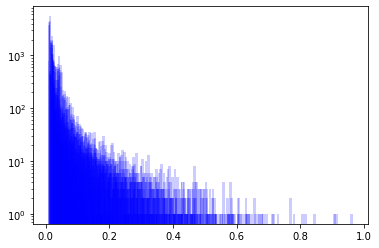

In [23]:
#sns.set_palette("bright")
for i in filtering_vst.T.columns:
    plt.hist(vst_dt[i], bins=100, alpha=0.2, log=True, color="blue")

,WestEurasia-SouthAsia,WestEurasia-Africa,WestEurasia-CentralAsiaSiberia,WestEurasia-Oceania,WestEurasia-America,WestEurasia-EastAsia,SouthAsia-Africa,SouthAsia-CentralAsiaSiberia,SouthAsia-Oceania,SouthAsia-America,...,Africa-CentralAsiaSiberia,Africa-Oceania,Africa-America,Africa-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-America,CentralAsiaSiberia-EastAsia,Oceania-America,Oceania-EastAsia,America-EastAsia
36,False,False,True,False,True,False,False,True,False,True,...,True,False,True,False,False,False,True,True,False,True
37,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
49,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,True,True,False,False,False,False
51,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
55,False,False,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8586,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8588,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
8646,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False
8647,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,True,False


In [22]:
vst_dt.iloc[:,3:25]

,WestEurasia-SouthAsia,WestEurasia-Africa,WestEurasia-CentralAsiaSiberia,WestEurasia-Oceania,WestEurasia-America,WestEurasia-EastAsia,SouthAsia-Africa,SouthAsia-CentralAsiaSiberia,SouthAsia-Oceania,SouthAsia-America,...,Africa-Oceania,Africa-America,Africa-EastAsia,CentralAsiaSiberia-Oceania,CentralAsiaSiberia-America,CentralAsiaSiberia-EastAsia,Oceania-America,Oceania-EastAsia,America-EastAsia,i
0,0.00888,0.01589,0.03326,0.04202,0.01588,0.00841,0.01985,0.04667,0.05705,0.02284,...,0.09138,0.01521,0.02111,0.13688,0.02606,0.04539,0.08230,0.04721,0.02251,0.0
1,0.01656,0.08613,0.01001,0.01862,0.04420,0.00859,0.12591,0.02153,0.01591,0.07918,...,0.17269,0.04347,0.08381,0.02733,0.04270,0.01370,0.11817,0.02574,0.04746,1.0
2,0.01447,0.05338,0.02077,0.02643,0.04762,0.01282,0.09619,0.05302,0.05481,0.09950,...,0.01701,0.01521,0.06423,0.02219,0.04843,0.03433,0.02487,0.03913,0.05833,2.0
3,0.01353,0.01351,0.03442,0.01351,0.01351,0.02386,0.03401,0.02461,0.03169,0.03138,...,NaN,NaN,0.04361,0.05488,0.05409,0.01549,NaN,0.03723,0.03637,3.0
4,0.01029,0.00848,0.01327,0.01619,0.03137,0.01214,0.01325,0.01577,0.03087,0.03068,...,0.02273,0.03380,0.01429,0.03704,0.03011,0.01370,0.04545,0.02941,0.02619,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8645,0.00885,0.03265,0.01718,0.01687,0.01666,0.01875,0.03368,0.02564,0.02564,0.02564,...,0.05444,0.05275,0.06784,NaN,NaN,NaN,NaN,NaN,NaN,8645.0
8646,0.00886,0.05787,0.01827,0.15949,0.01066,0.01285,0.06030,0.02574,0.19101,0.01681,...,0.06213,0.06873,0.09885,0.30299,0.02814,0.01498,0.24022,0.25329,0.01709,8646.0
8647,0.00885,0.05665,0.01856,0.15703,0.01072,0.01312,0.06030,0.02574,0.19101,0.01681,...,0.06213,0.06873,0.09885,0.30299,0.02814,0.01498,0.24022,0.25329,0.01709,8647.0
8648,0.01351,0.01582,0.01351,0.01351,0.01858,0.01351,0.02273,NaN,NaN,0.04545,...,0.02273,0.04892,0.02273,NaN,0.04545,NaN,0.04545,NaN,0.04545,8648.0
